In [1]:
import pandas as pd
import numpy as np

In [161]:
df = pd.read_csv("/kaggle/input/dsn-hackathon/train.csv")
test = pd.read_csv("/kaggle/input/dsn-hackathon/test.csv")
sub = pd.read_csv("/kaggle/input/dsn-hackathon/sample_submission.csv")

In [162]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [163]:
df.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

In [164]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [165]:
test

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
125685,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [167]:
df.shape

(188533, 12)

Iteration 1
- Assign all mising in fuel_type to -
- Random assignment for accident
- Drop clean_title

In [168]:
df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [169]:
df.fuel_type.value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [170]:
df['fuel_type'] = df['fuel_type'].fillna('–')

In [171]:
# Drop rows with -
df = df[df['fuel_type']!='–']

In [172]:
df.accident.value_counts()

accident
None reported                             139241
At least 1 accident or damage reported     41062
Name: count, dtype: int64

In [173]:
df = df[~df['accident'].isnull()]

In [174]:
df.clean_title.value_counts()

clean_title
Yes    161855
Name: count, dtype: int64

In [175]:
df = df.drop(columns=['clean_title'])
test = test.drop(columns=['clean_title'])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180303 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         180303 non-null  object
 1   model         180303 non-null  object
 2   model_year    180303 non-null  int64 
 3   milage        180303 non-null  int64 
 4   fuel_type     180303 non-null  object
 5   engine        180303 non-null  object
 6   transmission  180303 non-null  object
 7   ext_col       180303 non-null  object
 8   int_col       180303 non-null  object
 9   accident      180303 non-null  object
 10  price         180303 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 16.5+ MB


In [177]:
import seaborn as sns

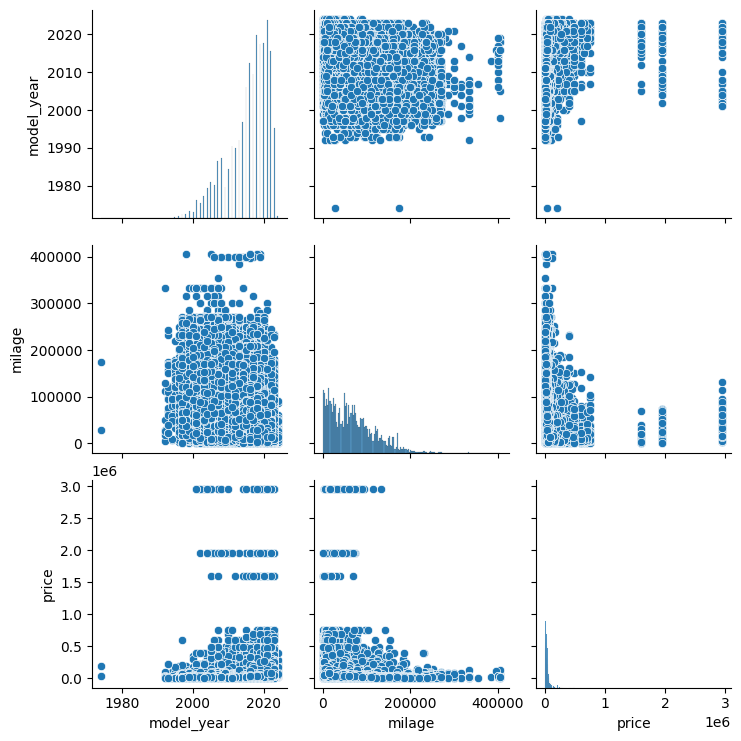

In [178]:
sns.pairplot(df)

In [179]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500


In [180]:
# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor
import catboost
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import mean_squared_error

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [181]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), XGBRegressor(), LGBMRegressor(verbose=0), CatBoostRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor()]

In [182]:
from sklearn.preprocessing import RobustScaler, LabelEncoder, OrdinalEncoder, PowerTransformer
from sklearn.model_selection import train_test_split

In [183]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,97500


In [184]:
int_cols = df.select_dtypes(include=['number']).columns.tolist()
obj_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric columns:", int_cols)
print("Non-numeric columns:", obj_cols)

Numeric columns: ['model_year', 'milage', 'price']
Non-numeric columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident']


In [185]:
for col in obj_cols:
    print(df[col].value_counts())
    print("  ---  ")

brand
Ford             22238
Mercedes-Benz    18929
BMW              16768
Chevrolet        16036
Audi             10667
Porsche          10169
Land              9417
Toyota            8674
Lexus             8573
Jeep              6281
Cadillac          4569
RAM               4169
Nissan            3802
INFINITI          3235
GMC               3138
Dodge             2878
Mazda             2635
Kia               2396
Lincoln           2388
Subaru            2369
Acura             2236
Honda             2047
Hyundai           1980
Volkswagen        1715
Jaguar            1282
Bentley           1122
MINI              1049
Genesis            951
Buick              927
Maserati           926
Lamborghini        792
Volvo              695
Chrysler           684
Alfa               664
Rolls-Royce        550
Mitsubishi         542
Pontiac            532
Hummer             516
Tesla              371
Ferrari            349
McLaren            241
Aston              235
Saturn             145
Scion

In [186]:
for col in obj_cols:
    df[col] = df[col].str.lower()
    test[col] = test[col].str.lower()

In [187]:
import re

def standardize_transmission(value):
    if pd.isna(value):
        return value
    
    val = value.lower().strip()
    
    # Replace "a/t" with "automatic"
    val = re.sub(r'\ba/t\b', 'automatic', val)
    
    # Replace "m/t" or "mt" with "manual"
    val = re.sub(r'\bm/t\b', 'manual', val)
#    val = re.sub(r'\bmt\b', 'manual', val)
    
    # Clean up double spaces
    val = re.sub(r'\s+', ' ', val).strip()
    
    return val

# Apply function
df['transmission'] = df['transmission'].apply(standardize_transmission)
test['transmission'] = test['transmission'].apply(standardize_transmission)

# Check result
print(df['transmission'].value_counts().head(20))


transmission
automatic                            56787
8-speed automatic                    28430
6-speed automatic                    20558
transmission w/dual shift mode       18981
6-speed manual                       11947
7-speed automatic                    11141
10-speed automatic                   10952
9-speed automatic                     6082
5-speed automatic                     3307
4-speed automatic                     2505
5-speed manual                        2317
cvt transmission                      1960
manual                                1168
7-speed automatic with auto-shift     1157
automatic cvt                          815
8-speed automatic with auto-shift      538
7-speed manual                         488
1-speed automatic                      298
transmission overdrive switch          156
6-speed automatic with auto-shift      109
Name: count, dtype: int64


In [188]:
for col in obj_cols:
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df[col] = enc.fit_transform(df[[col]])
    test[col] = enc.transform(test[[col]])

In [189]:
import seaborn as sns

In [190]:
import warnings
warnings.filterwarnings('ignore')

<Axes: ylabel='Count'>

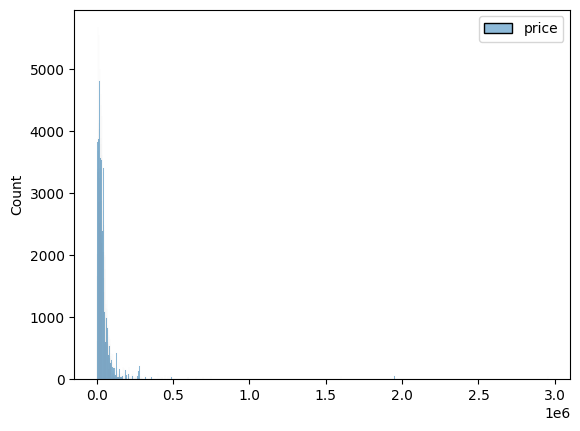

In [191]:
y = df[[int_cols[2]]]
sns.histplot(y)

<Axes: ylabel='Count'>

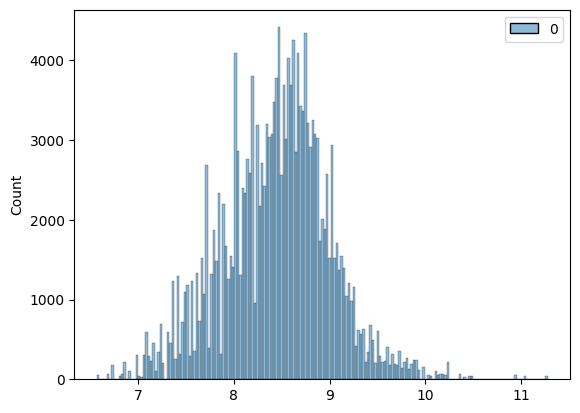

In [192]:
year_t = PowerTransformer(method='box-cox', standardize=False)
sns.histplot(year_t.fit_transform(y))

In [144]:
# Power Transform columns

transformers = {}

for col in int_cols:
    if col=="price":
        print('skip')

    else:
        y = df[[col]]
        z = test[[col]]
        trans = PowerTransformer(method='box-cox', standardize=False)
        df[col] = trans.fit_transform(y)
        test[col] = trans.transform(z)
        transformers[col] = trans

skip


In [145]:
transformers

{'model_year': PowerTransformer(method='box-cox', standardize=False),
 'milage': PowerTransformer(method='box-cox', standardize=False)}

In [146]:
# Inverse code    transformers['price'].inverse_transform(df[['price']])

In [193]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,37.0,458.0,2007,213000,2.0,112.0,26.0,313.0,69.0,1.0,4200
1,28.0,953.0,2002,143250,2.0,360.0,26.0,264.0,8.0,0.0,4999
2,9.0,1546.0,2002,136731,1.0,633.0,26.0,36.0,69.0,1.0,13900
3,15.0,756.0,2017,19500,2.0,855.0,35.0,26.0,12.0,1.0,45000
4,35.0,1055.0,2021,7388,2.0,254.0,16.0,26.0,8.0,1.0,97500


In [194]:
# Split

X = df.drop(["price"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1234, shuffle=True)

In [157]:
models

[LinearRegression(),
 Ridge(),
 Lasso(),
 ElasticNet(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 LGBMRegressor(verbose=0),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 DecisionTreeRegressor()]

In [158]:
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{model}: {rmse(y_test, pred)}")

ValueError: array must not contain infs or NaNs

In [67]:
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{model}: {rmse(y_test, pred)}")


LinearRegression(): 73003.42760834938
Ridge(): 73003.42812624008
Lasso(): 73003.44800358872
ElasticNet(): 73029.48877224895
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...): 75190.177091555
LGBMRegressor(verbose=0): 71457.52628070636
Learning rate set to 0.088897
0:	learn: 78027.2142383	total: 17.6ms	

In [195]:
model = GradientBoostingRegressor()

In [196]:
# Split

X = df.drop(["price"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state=1234, shuffle=True)

In [197]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [198]:
prd = model.predict(test)

In [199]:
# pred = transformers['price'].inverse_transform(prd.reshape(-1,1))

In [200]:
sub["price"] = prd

In [201]:
sub.to_csv("nuwaaashh.csv", index=False)